In [438]:
import numpy as np
import random
from typing import List
import matplotlib.pyplot as plt

### Случайная величина распределена равномерно на отрезке $[\theta, 2 \theta].$


### Сгенеруйте выборку объёму n = 100 для некоторого значения парамeтра $\theta$.

In [439]:
theta = 1

def p(x: float) -> float:
    return  1 / theta if (2 * theta >= x >= theta) else 0

def F(x: float) -> float:
    return x/theta - 1 if (2 * theta >= x >= theta) else 0

def F_inv(y: float) -> float:
    return theta * (y + 1)

def generate_samples(n: int) -> List[float]:
    return [F_inv(random.random()) for _ in range(n)]

N = 100
arr = generate_samples(N)

### f) Вычислите указанные выше доверительные интегралы для доверительной веротяности 0.95.

#### Точный доверительный интервал

$$
P(\frac{x_{max}}{1 + \sqrt[n]{\frac{1 + \beta}{2}}} < \theta < \frac{x_{max}}{1 + \sqrt[n]{\frac{1 - \beta}{2}}})=\beta
$$

In [440]:
beta = 0.95
x_max = np.max(arr)

lower_border1 = x_max/(1 + ((1 + beta) / 2) ** (1 / N))
upper_border1 = x_max/(1 + ((1 - beta) / 2) ** (1 / N))

print(f"Доверительный интервал: ({lower_border1}, {upper_border1}), длина: {upper_border1 - lower_border1}")

Доверительный интервал: (0.9967077042425534, 1.0149608097893907), длина: 0.018253105546837345


#### Асимптотический доверительный интервал

$$
P(\tilde{\theta_{1}} - \frac{2 s t_2 \sqrt{n-1}}{3 n} < \theta < \tilde{\theta_{1}} - \frac{2 s t_1 \sqrt{n-1}}{3 n})=\beta
$$

In [441]:
beta = 0.95
theta_1 = 2 * np.mean(arr) / 3

s = np.sqrt((np.sum([(x - np.mean(arr)) ** 2 for x in arr]))/(N-1))

lower_border2 = theta_1 - 2 * s * 1.96 * np.sqrt(N - 1)/(3 * N)
upper_border2 = theta_1 + 2 * s * 1.96 * np.sqrt(N - 1)/(3 * N)

print(f"Доверительный интервал: ({lower_border2}, {upper_border2}), длина: {upper_border2 - lower_border2}")

Доверительный интервал: (0.9532943216458581, 1.0295915077060431), длина: 0.07629718606018498


### g)  Численно постройте бутстраповский доверительный интервал.

In [442]:
n_iterations = 1000
beta = 0.95

extra_h = (N + 1) * x_max / (2 * N + 1)

bootstrap_deltas = []

for _ in range(n_iterations):
    sample = np.random.choice(arr, N)
    bootstrap_deltas.append((N + 1) * np.max(sample) / (2 * N + 1) - extra_h)

variation_row = sorted(bootstrap_deltas)

t1 = variation_row[int((1 - beta) * n_iterations / 2)]
t2 = variation_row[int((1 + beta) * n_iterations / 2)]


lower_border3 = extra_h - t2
upper_border3 = extra_h - t1

print(f"Доверительный интервал: ({lower_border3}, {upper_border3}), длина: {upper_border3 - lower_border3}")


Доверительный интервал: (1.0015396650958095, 1.0050633982971908), длина: 0.0035237332013813294


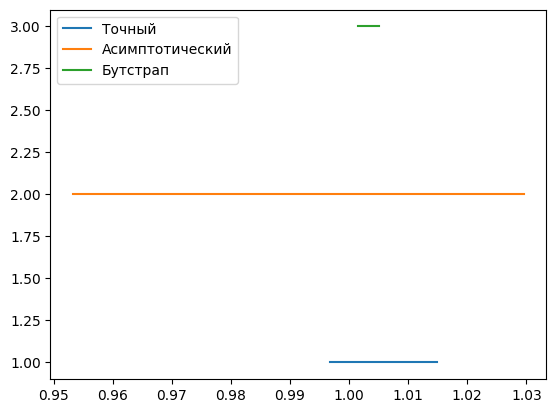

In [443]:
x1 = np.linspace(lower_border1, upper_border1, 100)
y1 = [1] * 100

x2 = np.linspace(lower_border2, upper_border2, 100)
y2 = [2] * 100

x3 = np.linspace(lower_border3, upper_border3, 100)
y3 = [3] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

plt.legend(["Точный", "Асимптотический", "Бутстрап"])

plt.show()

### h) Сравнить все интервалы. 

Длина доверительного интервала: Непараметрический бутстрап < Точный < Асимптотический

Так потому, что бутстрап занижает длину доверительного интервала, а точный даёт оценку лучше, чем асимптотический.